#### KDD
##### Aditya Ambre
##### 20200802023
##### LAB - 5 Regression 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Linear Regression


In [ ]:
data_df = pd.read_csv("data.csv", names=["X","Y"])
data_df

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


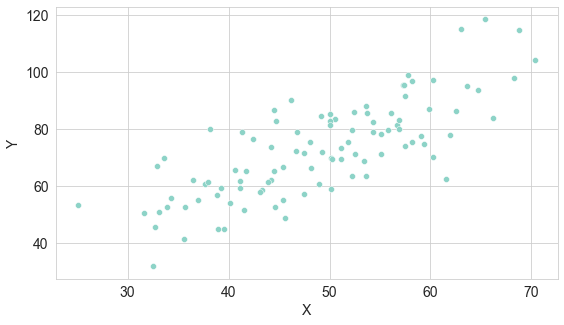

In [ ]:
sns.scatterplot(x=data_df["X"],y=data_df["Y"])
plt.show()

In [ ]:
# Gradient Descent to find the value of m and c.

# Let initial value of m & c be 0.
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 10000  # The no. of iterations

n = float(len(data_df["X"])) # No. of elements in X

# Performing Gradient Descent 
for i in range(epochs):
    # The current predicted value of Y
    Y_pred = m*data_df["X"] + c

    # Derivative w.r.t. m
    D_m = (-2/n) * sum(data_df["X"] * (data_df["Y"] - Y_pred))
    
    # Derivative w.r.t. c
    D_c = (-2/n) * sum(data_df["Y"] - Y_pred)

    # Updating m & c.
    m = m - L * D_m
    c = c - L * D_c
    
print(f"The value of Slope (m) : {m}")
print(f"The value of Y-intercept (c) : {c}")

The value of Slope (m) : 1.4675440436333025
The value of Y-intercept (c) : 0.6078985997054946


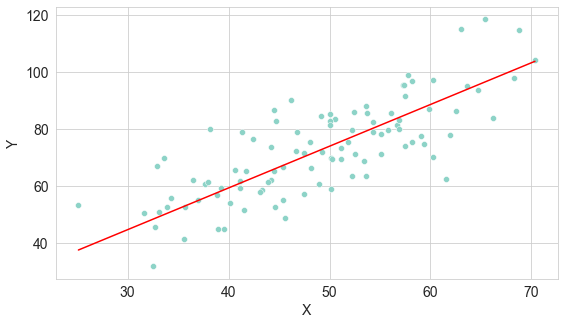

In [ ]:
# Making predictions
Y_pred = m*data_df["X"] + c

sns.scatterplot(x = data_df["X"], y = data_df["Y"]) 
sns.lineplot(x = [min(data_df["X"]), max(data_df["X"])], y = [min(Y_pred), max(Y_pred)], color="red")
plt.show()

In [ ]:
df = pd.DataFrame()
df["Predicted Y"] = list(i for i in Y_pred)
df["Actual Y"] = [i for i in data_df["Y"]]
df

,Predicted Y,Actual Y
0,48.306522,31.707006
1,79.014087,68.777596
2,90.906409,62.562382
3,70.280491,71.546632
4,88.386416,87.230925
...,...,...
95,74.029383,81.536991
96,72.869423,72.111832
97,74.043180,85.232007
98,71.269937,66.224958


In [ ]:
mae = mean_absolute_error(data_df["Y"], Y_pred)
mse = mean_squared_error(data_df["Y"], Y_pred)
r_sq = r2_score(data_df["Y"], Y_pred)
n = 100
k = 1
adj_r_sq = 1 - ((1-r_sq)*(n-1)/(n-k-1))

print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"Root Mean Squared Error : {np.sqrt(mse)}")
print(f"R - score : {r_sq}")
print(f"Adjusted R - score : {adj_r_sq}")

Mean Absolute Error : 8.408972143876746
Mean Squared Error : 112.31533427075733
Root Mean Squared Error : 10.59789291655456
R - score : 0.5911647137465315
Adjusted R - score : 0.586992925111292


### Linear regression using Sklearn

In [ ]:
# Loading dataset
house_df = pd.read_csv("train.csv")
house_df = house_df.set_index(["Id"])
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [ ]:
all_data_na = (house_df.isnull().sum() / len(house_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio (in %)':all_data_na})
missing_data.head(20)

,Missing Ratio (in %)
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [ ]:
house_df = house_df.drop(['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu'], axis=1)
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [ ]:
a = house_df.isnull().sum().sort_values(ascending=False)[:19].to_frame()
l = list(a.index.values)
house_df[l].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   GarageType    1379 non-null   object 
 2   GarageYrBlt   1379 non-null   float64
 3   GarageFinish  1379 non-null   object 
 4   GarageQual    1379 non-null   object 
 5   GarageCond    1379 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   BsmtExposure  1422 non-null   object 
 8   BsmtQual      1423 non-null   object 
 9   BsmtCond      1423 non-null   object 
 10  BsmtFinType1  1423 non-null   object 
 11  MasVnrArea    1452 non-null   float64
 12  MasVnrType    1452 non-null   object 
 13  Electrical    1459 non-null   object 
 14  KitchenAbvGr  1460 non-null   int64  
 15  BedroomAbvGr  1460 non-null   int64  
 16  HalfBath      1460 non-null   int64  
 17  FullBath      1460 non-null   int64  
 18  BsmtHalfBath  1460 non-null 

In [ ]:
num_columns = list(house_df[l].select_dtypes(include=np.number).columns)
cat_columns = list(house_df[l].select_dtypes(exclude=np.number).columns)

print("Numeric Variables : ",num_columns)
print()
print("Categorical Variables : ",cat_columns)

Numeric Variables :  ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath']

Categorical Variables :  ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']


In [ ]:
for i in list(house_df[l].columns):
    if i in num_columns:
        house_df[i].fillna(house_df[i].median(), inplace=True)
    else:
        house_df[i].fillna(house_df[i].mode()[0], inplace=True)

all_data_na = (house_df.isnull().sum() / len(house_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio (in %)':all_data_na})
missing_data

,Missing Ratio (in %)


In [ ]:
num_columns = list(house_df.select_dtypes(include=np.number).columns)
numeric_house_df = house_df[num_columns]
numeric_house_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [ ]:
X = numeric_house_df.drop(["SalePrice"], axis=1)
y = numeric_house_df[["SalePrice"]]

In [ ]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for MSSubClass is -168.21791434755443
The coefficient for LotFrontage is -135.12192981351347
The coefficient for LotArea is 0.496167291508215
The coefficient for OverallQual is 17215.08778461037
The coefficient for OverallCond is 4828.4684165671715
The coefficient for YearBuilt is 304.4161355407081
The coefficient for YearRemodAdd is 160.3221672373626
The coefficient for MasVnrArea is 28.271395648662168
The coefficient for BsmtFinSF1 is 8.16322634095247
The coefficient for BsmtFinSF2 is 0.4966468811064727
The coefficient for BsmtUnfSF is 0.8133079659790601
The coefficient for TotalBsmtSF is 9.473181186694122
The coefficient for 1stFlrSF is 11.14990034328294
The coefficient for 2ndFlrSF is 6.909432797195842
The coefficient for LowQualFinSF is 7.953811523403533
The coefficient for GrLivArea is 26.013144657567658
The coefficient for BsmtFullBath is 9162.550229059427
The coefficient for BsmtHalfBath is 5064.939956501357
The coefficient for FullBath is 5078.770205846245
The 

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1017270.5522175411


In [ ]:
Y_pred = regression_model.predict(X_test)

In [ ]:
df = pd.DataFrame()
df["Predicted Price"] = list(i[0] for i in Y_pred)
df["Actual Price"] = [i[0] for i in Y_test.values]
df

,Predicted Price,Actual Price
0,218777.437098,231500
1,171942.152780,179500
2,96797.554473,122000
3,47780.277496,84500
4,144247.516640,142000
...,...,...
360,201187.502779,187500
361,205895.584577,178000
362,133699.599924,125000
363,266116.579229,232000


In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r_sq = r2_score(Y_test, Y_pred)
n = len(X_train)
k = len(X_train.columns)
adj_r_sq = 1 - ((1-r_sq)*(n-1)/(n-k-1))

print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"Root Mean Squared Error : {np.sqrt(mse)}")
print(f"R - score : {r_sq}")
print(f"Adjusted R - score : {adj_r_sq}")

Mean Absolute Error : 21419.802663346858
Mean Squared Error : 1183893320.8038836
Root Mean Squared Error : 34407.75088267008
R - score : 0.8236476827474196
Adjusted R - score : 0.8176470367917552


### Logistic Regression using gradient descent

In [ ]:
import numpy as np

class Logistic_Regression:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Initialize the weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Loop over the number of epochs
        for epoch in range(self.num_epochs):
            # Compute the linear output of the model
            linear_output = np.dot(X, self.weights) + self.bias
            
            # Apply the sigmoid function to obtain the predicted probability
            predicted_prob = self._sigmoid(linear_output)
            
            # Compute the cross-entropy loss
            loss = self._cross_entropy_loss(predicted_prob, y)
            
            # Compute the gradient of the loss with respect to the weights and bias
            dw = np.dot(X.T, (predicted_prob - y)) / X.shape[0]
            db = np.mean(predicted_prob - y)
            
            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss {loss}")
        
    def predict(self, X):
        # Compute the linear output of the model
        linear_output = np.dot(X, self.weights) + self.bias
        
        # Apply the sigmoid function to obtain the predicted probability
        predicted_prob = self._sigmoid(linear_output)
        
        # Round the predicted probability to obtain the predicted label
        predicted_label = np.round(predicted_prob)
        
        return predicted_label
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _cross_entropy_loss(self, predicted_prob, y):
        epsilon = 1e-10
        loss = -np.mean(y * np.log(predicted_prob + epsilon) + (1 - y) * np.log(1 - predicted_prob + epsilon))
        return loss

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=4)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
model = Logistic_Regression()
model.fit(X_train, y_train)

Epoch 0, Loss 0.6931471803599453
Epoch 100, Loss 0.4849954392044489
Epoch 200, Loss 0.3892305663615654
Epoch 300, Loss 0.33535319789713885
Epoch 400, Loss 0.3010531371898201
Epoch 500, Loss 0.2773757988046518
Epoch 600, Loss 0.26007583253571553
Epoch 700, Loss 0.24689499262545914
Epoch 800, Loss 0.2365259385448078
Epoch 900, Loss 0.22816093491061634


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
tp,tn,fp,fn = 0,0,0,0
for i in range(len(y_test)):
    if y_test[i] == 1 and Y_pred[i] == 1:
        tp += 1
    elif y_test[i] == 1 and Y_pred[i] == 0:
        fn += 1
    elif y_test[i] == 0 and Y_pred[i] == 1:
        fp += 1
    elif y_test[i] == 0 and Y_pred[i] == 0:
        tn += 1

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*precision*recall/(precision+recall)

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 - score : {f1_score}")

Accuracy : 0.96
Precision : 0.9555555555555556
Recall : 0.9555555555555556
F1 - score : 0.9555555555555556


### Logistic Regression using Sklearn

In [ ]:
# Loading dataset
churn_df = pd.read_csv("Churn.csv")
churn_df = churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# One Hot Encoding for gender & Geography
churn_df = pd.get_dummies(data=churn_df, columns=['Geography', "Gender"])
churn_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [ ]:
x = churn_df.drop(['Exited'], axis = 1) # input columns
y = churn_df[["Exited"]] # our target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# scaled values from 0 to 1 for better results
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame()
X_train_scaled[list(X_train.columns)] = x_scaler.fit_transform(X_train[list(X_train.columns)])

X_test_scaled = pd.DataFrame()
X_test_scaled[list(X_test.columns)] = x_scaler.fit_transform(X_test[list(X_test.columns)])

Y_train_scaled = pd.DataFrame()
Y_train_scaled[list(Y_train.columns)] = y_scaler.fit_transform(Y_train[list(Y_train.columns)])

Y_test_scaled = pd.DataFrame()
Y_test_scaled[list(Y_test.columns)] = y_scaler.fit_transform(Y_test[list(Y_test.columns)])

In [ ]:
logit_regression_model = LogisticRegression()
logit_regression_model.fit(X_train_scaled,Y_train_scaled["Exited"])

LogisticRegression()

In [ ]:
Y_pred = logit_regression_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test_scaled,Y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1607
         1.0       0.55      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.60      2000
weighted avg       0.78      0.81      0.77      2000





---



# **Observations**

<li> <strong>Linear Regression</strong></li>

1. Mean Absolute Error measures the average absolute difference between the predicted values and the actual values, obtained is <strong>21419.802663346858</strong>

2. Mean Squared Error measures the average squared difference between the predicted values and the actual values, obtained is  <strong>1183893320.8038836</strong>

2. Mean Squared Error measures the average squared difference between the predicted values and the actual values, obtained is  <strong>1183893320.8038836</strong>
3. Root Mean Squared Error measures the square root of the average squared difference between the predicted values and the actual values, obtained is 34407.75088267008</strong>
4. R - score  is a measure of the linear relationship between two variables. The r-score ranges from -1 to 1, where -1 indicates a perfect negative correlation (i.e., as one variable increases, the other decreases), 1 indicates a perfect positive correlation (i.e., as one variable increases, the other also increases), and 0 indicates no correlation. R - Score obtained is 2. Mean Squared Error measures the average squared difference between the predicted values and the actual values, obtained is  <strong>1183893320.8038836</strong>


5. Adjusted R - score is a modification of the R-squared value that adjusts for the number of independent variables in a linear regression model, obtained is <strong> 0.8176470367917552</strong>

<li> <strong>Logistic Regression</strong></li>


0.              precision    recall  f1-score   support

         0       0.83      0.96      0.89      1607
         1       0.55      0.21      0.30       393

         Here 0 for Target input, 1 is for Not Target Input



1. Accuracy measures the percentage of correctly predicted labels (i.e., the number of true positives and true negatives) out of all the predictions made by the model is <strong> 0.96

2. Precision is the ratio of true positive predictions to the total number of positive predictions made by the model,  0.9556

3. Recall is the ratio of true positive predictions to the total number of actual positive cases in the dataset,  0.9556

4. F1 - score is the harmonic mean of precision and recall, and provides a single score that summarizes the model's ability to correctly classify both positive and negative cases,  0.9556



**Conclusion:**

Linear Regression and Logistic Regression was successfully performed using Inbuilt libraries and Functions
